<a href="https://colab.research.google.com/github/polaroidz/polaroidz/blob/main/Generalized_Linear_Models_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(datasets)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
glimpse(ChickWeight)

Rows: 578
Columns: 4
$ weight <dbl> 42, 51, 59, 64, 76, 93, 106, 125, 149, 171, 199, 205, 40, 49, 5…
$ Time   <dbl> 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 21, 0, 2, 4, 6, 8, 10, 1…
$ Chick  <ord> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ Diet   <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …


In [ ]:
mdl_weigth_diet <- lm(weight ~ Diet, data = ChickWeight)

mdl_weigth_diet


Call:
lm(formula = weight ~ Diet, data = ChickWeight)

Coefficients:
(Intercept)        Diet2        Diet3        Diet4  
     102.65        19.97        40.30        32.62  


In [ ]:
# Fit a glm()
mdl_glm <- glm(formula = weight ~ Diet - 1, data = ChickWeight, family = 'gaussian')

mdl_glm


Call:  glm(formula = weight ~ Diet - 1, family = "gaussian", data = ChickWeight)

Coefficients:
Diet1  Diet2  Diet3  Diet4  
102.6  122.6  142.9  135.3  

Degrees of Freedom: 578 Total (i.e. Null);  574 Residual
Null Deviance:	    11490000 
Residual Deviance: 2759000 	AIC: 6546

In [ ]:
# Use poisson family for counts
glm(y ~ x, data, family = 'poisson')

In [ ]:
summary(mdl_glm)


Call:
glm(formula = weight ~ Diet - 1, family = "gaussian", data = ChickWeight)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-103.95   -53.65   -13.64    40.38   230.05  

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
Diet1  102.645      4.674   21.96   <2e-16 ***
Diet2  122.617      6.329   19.38   <2e-16 ***
Diet3  142.950      6.329   22.59   <2e-16 ***
Diet4  135.263      6.382   21.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 4806.086)

    Null deviance: 11491907  on 578  degrees of freedom
Residual deviance:  2758693  on 574  degrees of freedom
AIC: 6546.4

Number of Fisher Scoring iterations: 2


In [ ]:
library(broom)

tidy(mdl_glm)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Diet1,102.6455,4.673954,21.96116,4.712762e-78
Diet2,122.6167,6.328563,19.37512,1.007028e-64
Diet3,142.9500,6.328563,22.58806,2.594595e-81
Diet4,135.2627,6.381970,21.19451,4.449019e-74


In [ ]:
coef(mdl_glm)

Diet1    Diet2    Diet3    Diet4 
102.6455 122.6167 142.9500 135.2627

In [ ]:
confint(mdl_glm)

Waiting for profiling to be done...



,2.5 %,97.5 %
Diet1,93.48467,111.8062
Diet2,110.21291,135.0204
Diet3,130.54624,155.3538
Diet4,122.75428,147.7711


In [ ]:
mdl_logit <- glm(y ~ x, data = dat, family = 'binomial')

In [ ]:
# Fit a wide form logistic regression
lr_2 <- glm(cbind(success, fail) ~ x, family = 'binomial',
            data = data_wide)

# Print the output of lr_2
print(lr_2)

# Using dataWide, fit a glm with successProportion
# predicted by x and weights = Total
lr_3 <- glm(successProportion ~ x, family = 'binomial',
            data = data_wide, weights = Total)

# Print the output of lr_3
print(lr_3)

In [ ]:
glm(x ~ y, data, family = binomial(link = "logit")) # default
glm(x ~ y, data, family = binomial(link = "probit"))

In [ ]:
library(broom)

poisson_out <- glm(y ~ x, family = 'poisson')
tidy(poisson_out, exponentiate = TRUE)

In [ ]:
# Use geom_smooth to plot a continuous predictor variable
ggplot(data = dat, aes(x = dose, y = cells)) + 
	geom_jitter(width = 0.05, height = 0.05) + 
	geom_smooth(method = 'glm', method.args = list(family = 'poisson'))

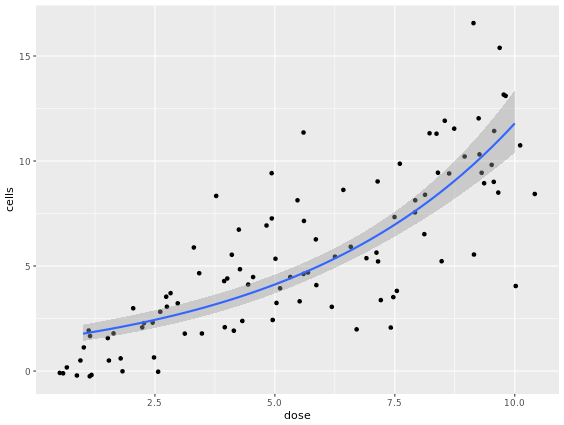

In [ ]:
# Create a jittered plot of MilesOneWay vs Bus2 using the bus dataset
gg_jitter <- ggplot(data = bus, aes(x = MilesOneWay, y = Bus2)) + 
	geom_jitter(width = 0, height = 0.05) +
	ylab("Probability of riding the bus") +
	xlab("One-way commute trip (in miles)")

# Add a geom_smooth() to your plot
gg_jitter + geom_smooth()

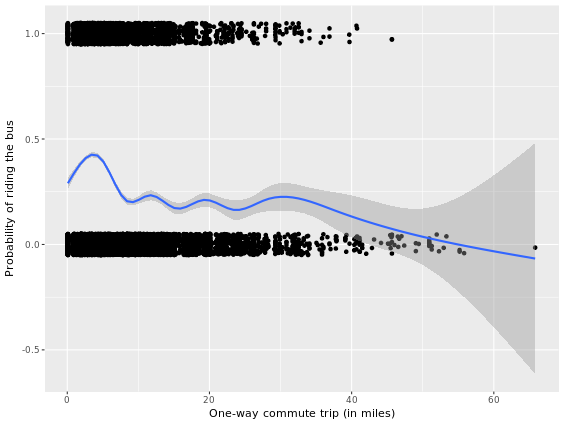

In [ ]:
# Create a jittered plot of MilesOneWay vs Bus2 using the bus dataset
gg_jitter <- ggplot(data = bus, aes(x = MilesOneWay, y = Bus2)) + 
	geom_jitter(width = 0, height = 0.05) +
	ylab("Probability of riding the bus") +
	xlab("One-way commute trip (in miles)")

# Add a geom_smooth() that uses a GLM method to your plot
gg_jitter + geom_smooth(method = 'glm', method.args = list(family = 'binomial'))

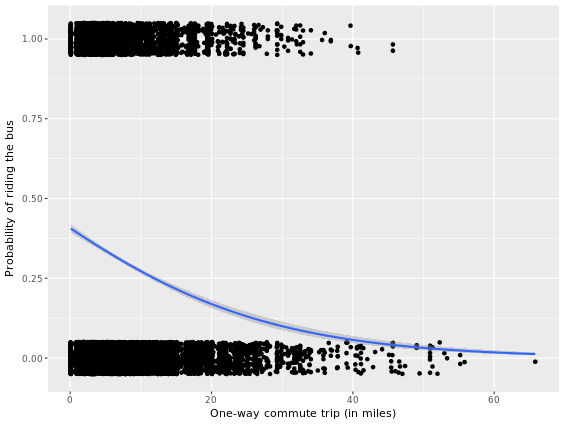